In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [6]:
data = data.drop(columns=['_c39'])

<strong>From initial analysis -: 
        <ul>
            <li>We can drop policy number as it is an idnetifier variable</li>
            <li>Policy Bind date can also be dropped</li>
            <li>Incident Location can also be dropped as it is a categorical variable with 1000 diffenret values</li>
        </ul>
</strong>

In [7]:
data = data.drop(columns=['policy_number', 'policy_bind_date', 'incident_location'])

<h3>EDA</h3>

In [8]:
cat_cols = [col for col in data.columns if data[col].dtype=='object']

In [9]:
cat_cols

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [10]:
num_cols = [col for col in data.columns if col not in cat_cols]

In [11]:
num_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

<h4>StripPlots</h4>

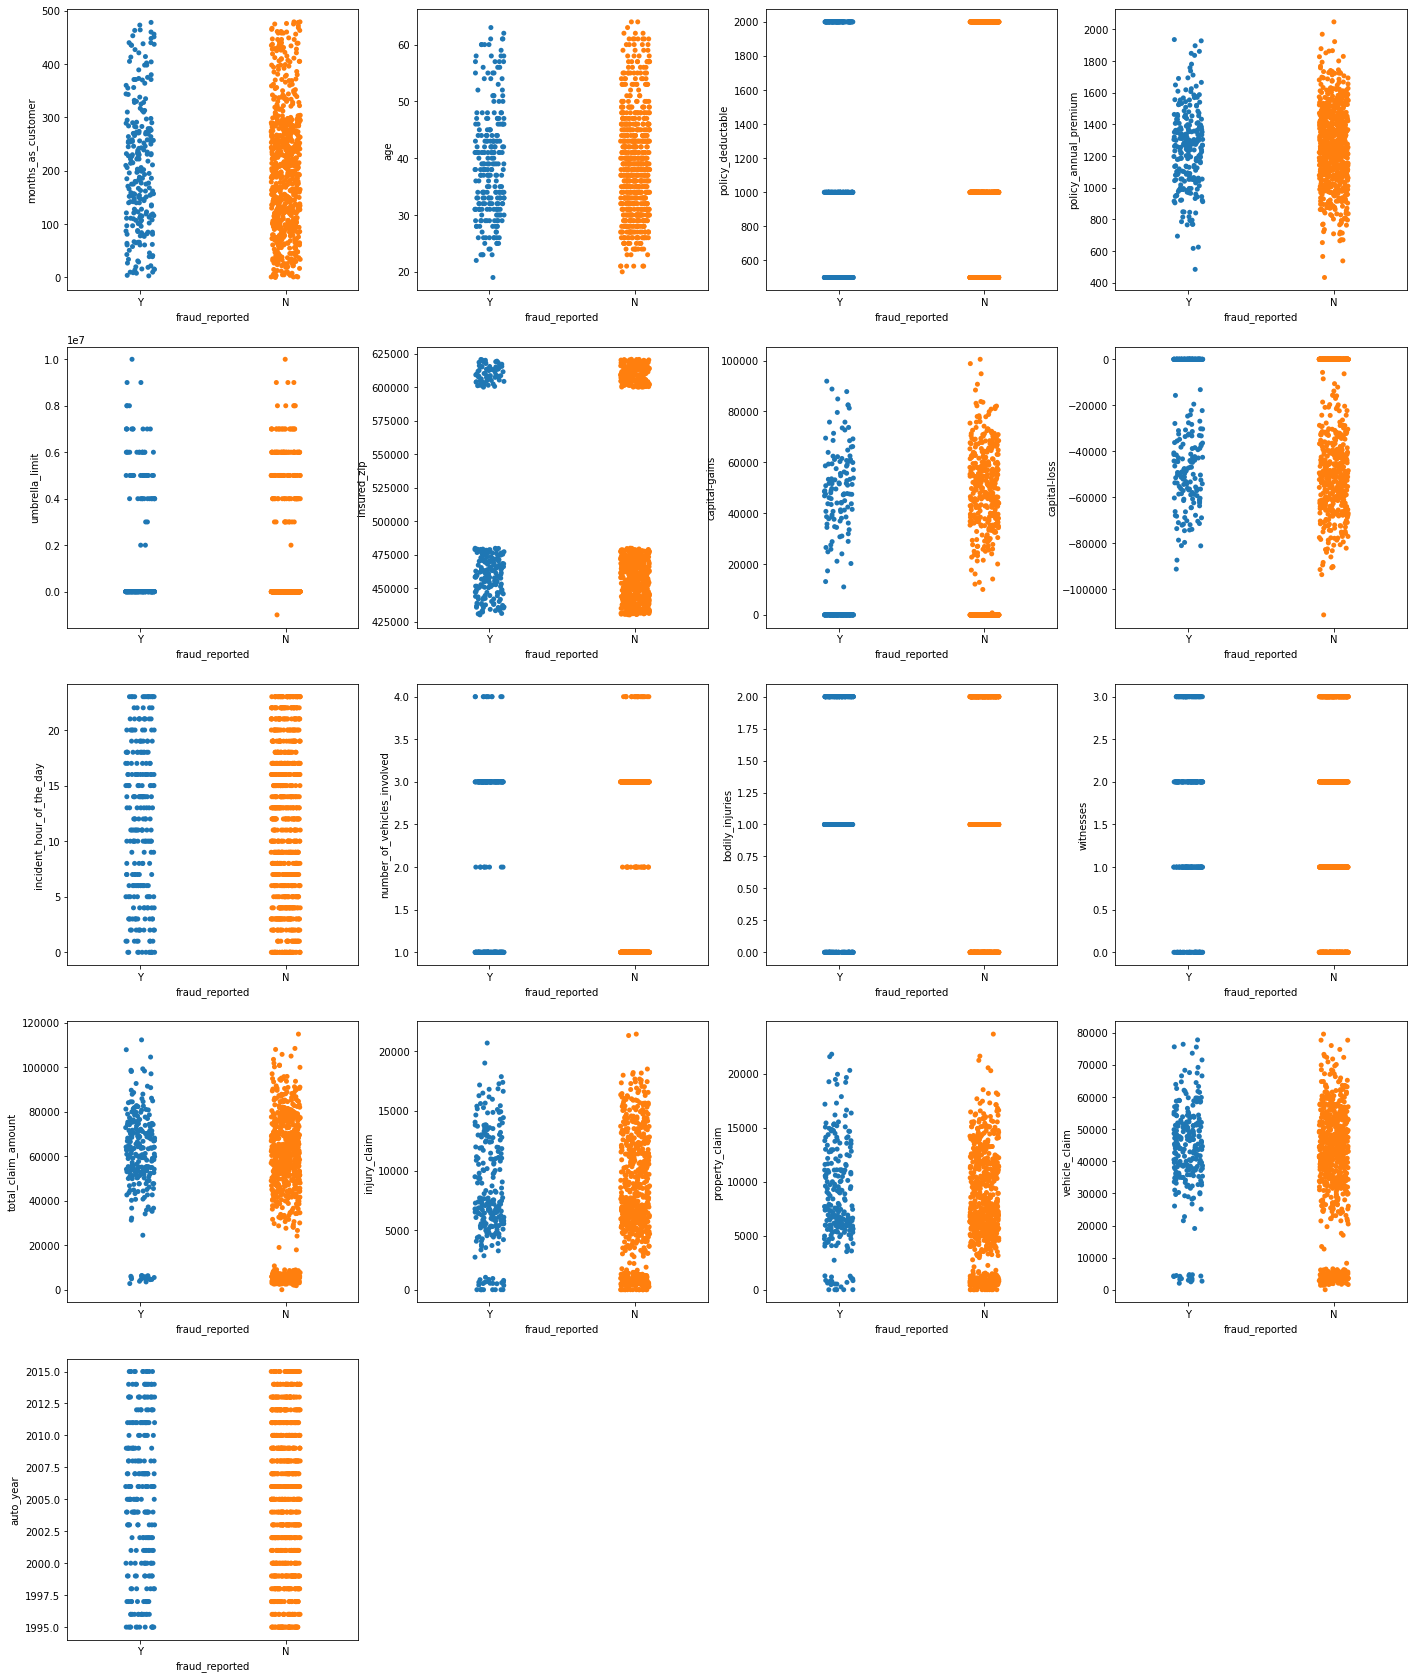

In [12]:
plt.figure(figsize=(24,30))
plotnumber  = 1
for col in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.stripplot(x='fraud_reported',y=col, data=data)
    plotnumber+=1

<strong>Not much could be interpreted from above plots</strong>

<h4>KDE Plots</h4>

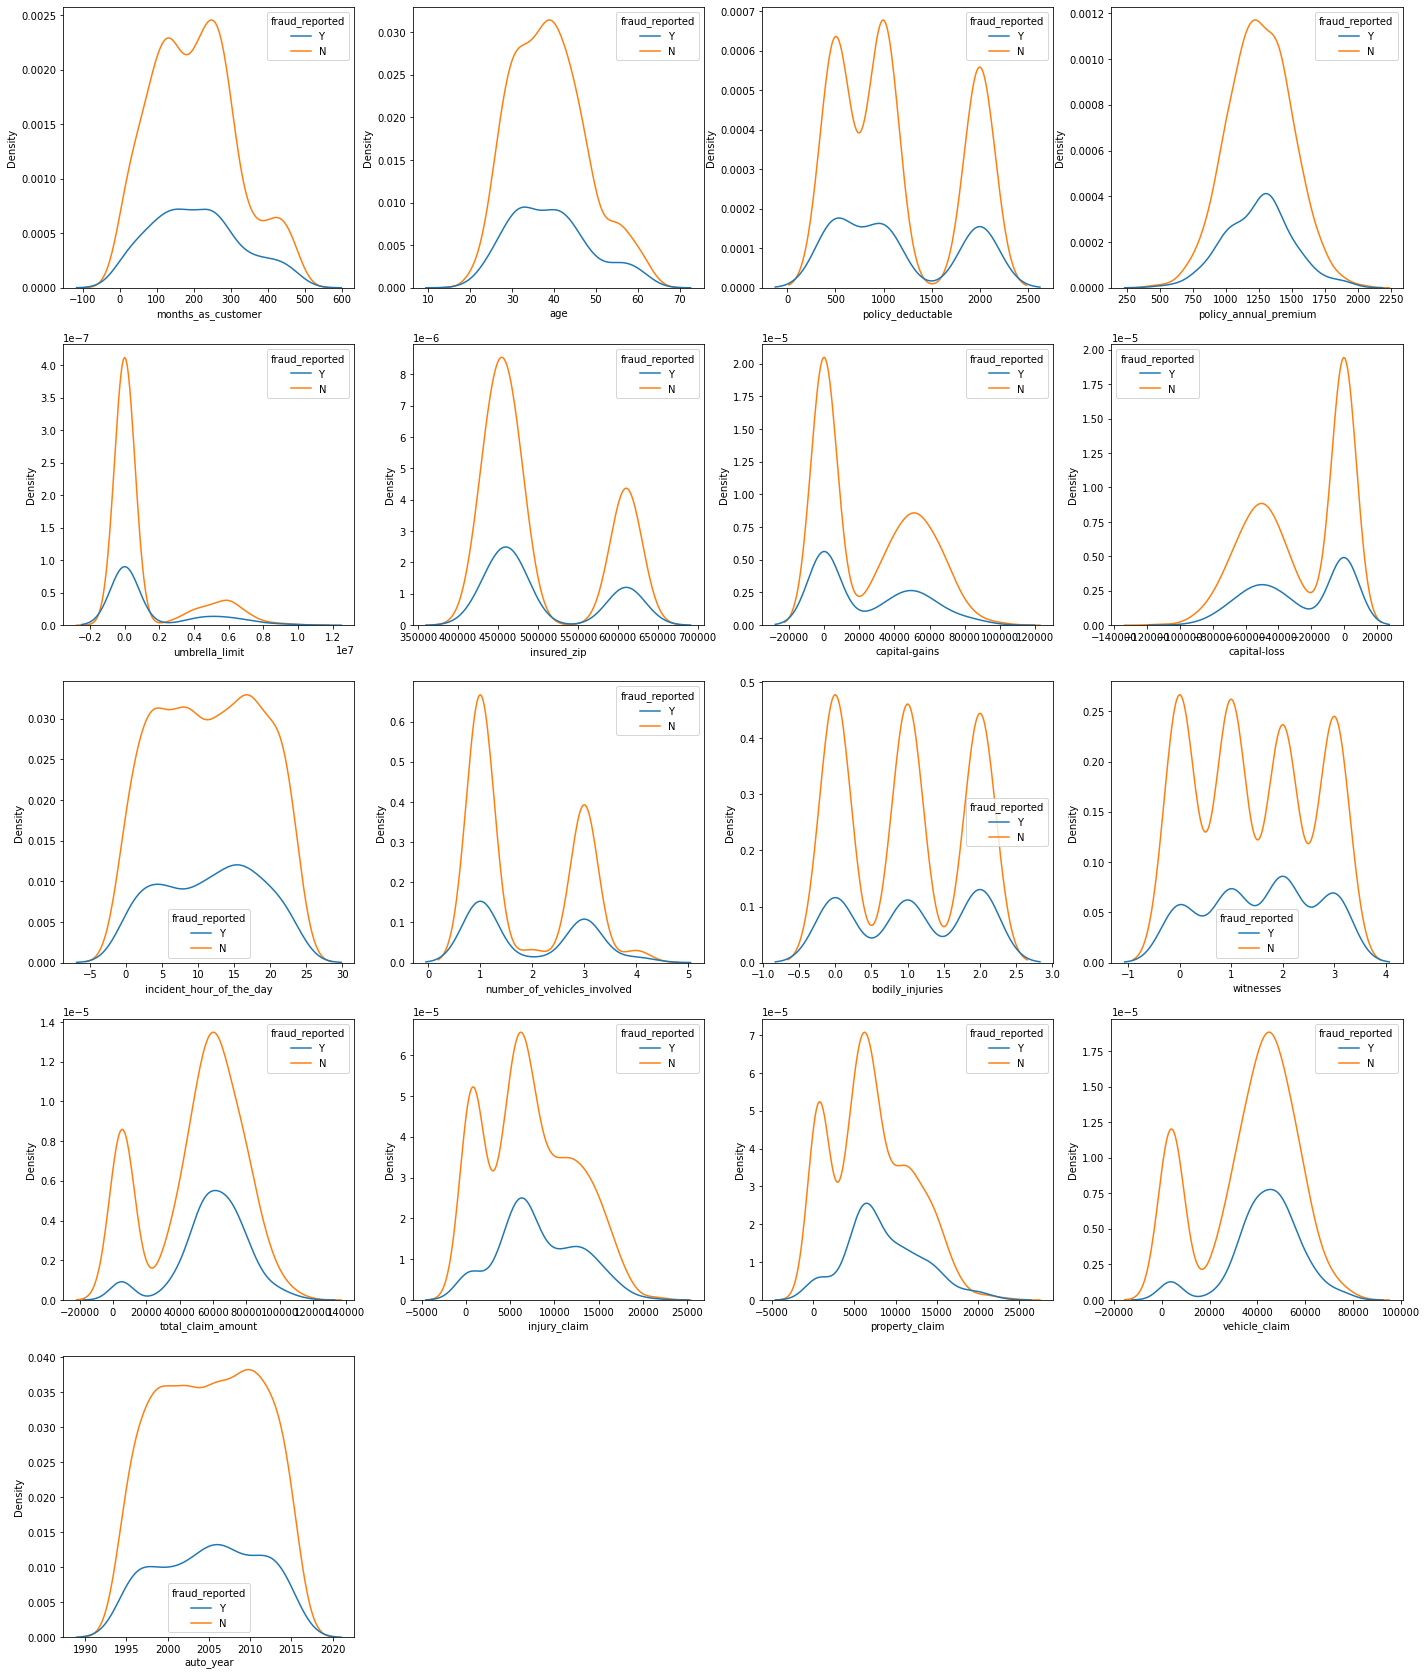

In [13]:
plt.figure(figsize=(24,30))
plotnumber  = 1
for col in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.kdeplot(col, data=data, hue='fraud_reported')
    plotnumber+=1

<strong>Almost all the variables have their peaks at the same places</strong>

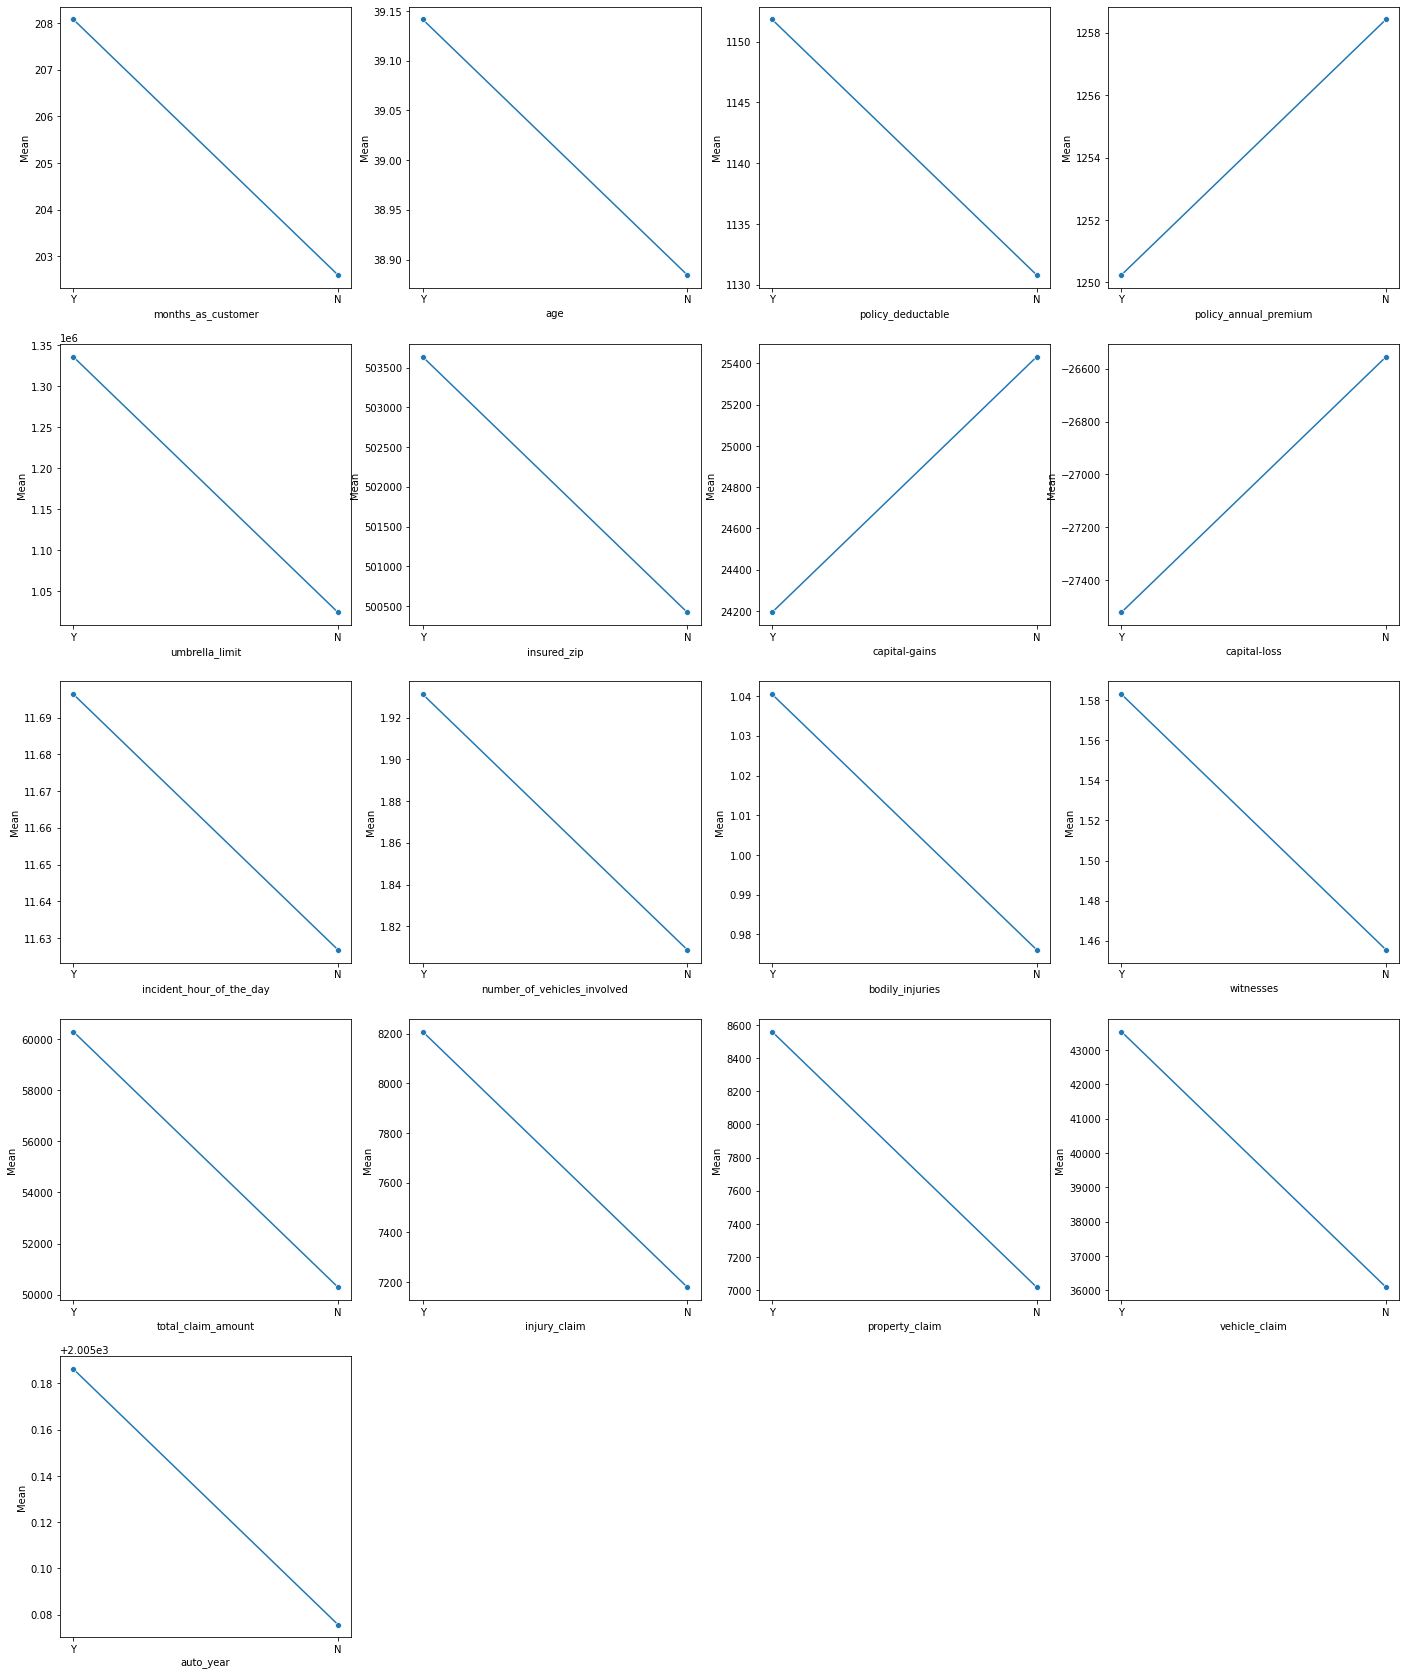

In [14]:
plt.figure(figsize=(24,30))
plotnumber = 1
for col in num_cols:
    mean_vals = pd.DataFrame()
    unique_val = data['fraud_reported'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['fraud_reported'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(5,4, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<h4>Count plots</h4>

In [15]:
fraud_y = data[data['fraud_reported'] =='Y']
fraud_n = data[data['fraud_reported'] =='N']

In [16]:
fraud_y.shape

(247, 36)

In [17]:
fraud_n.shape

(753, 36)

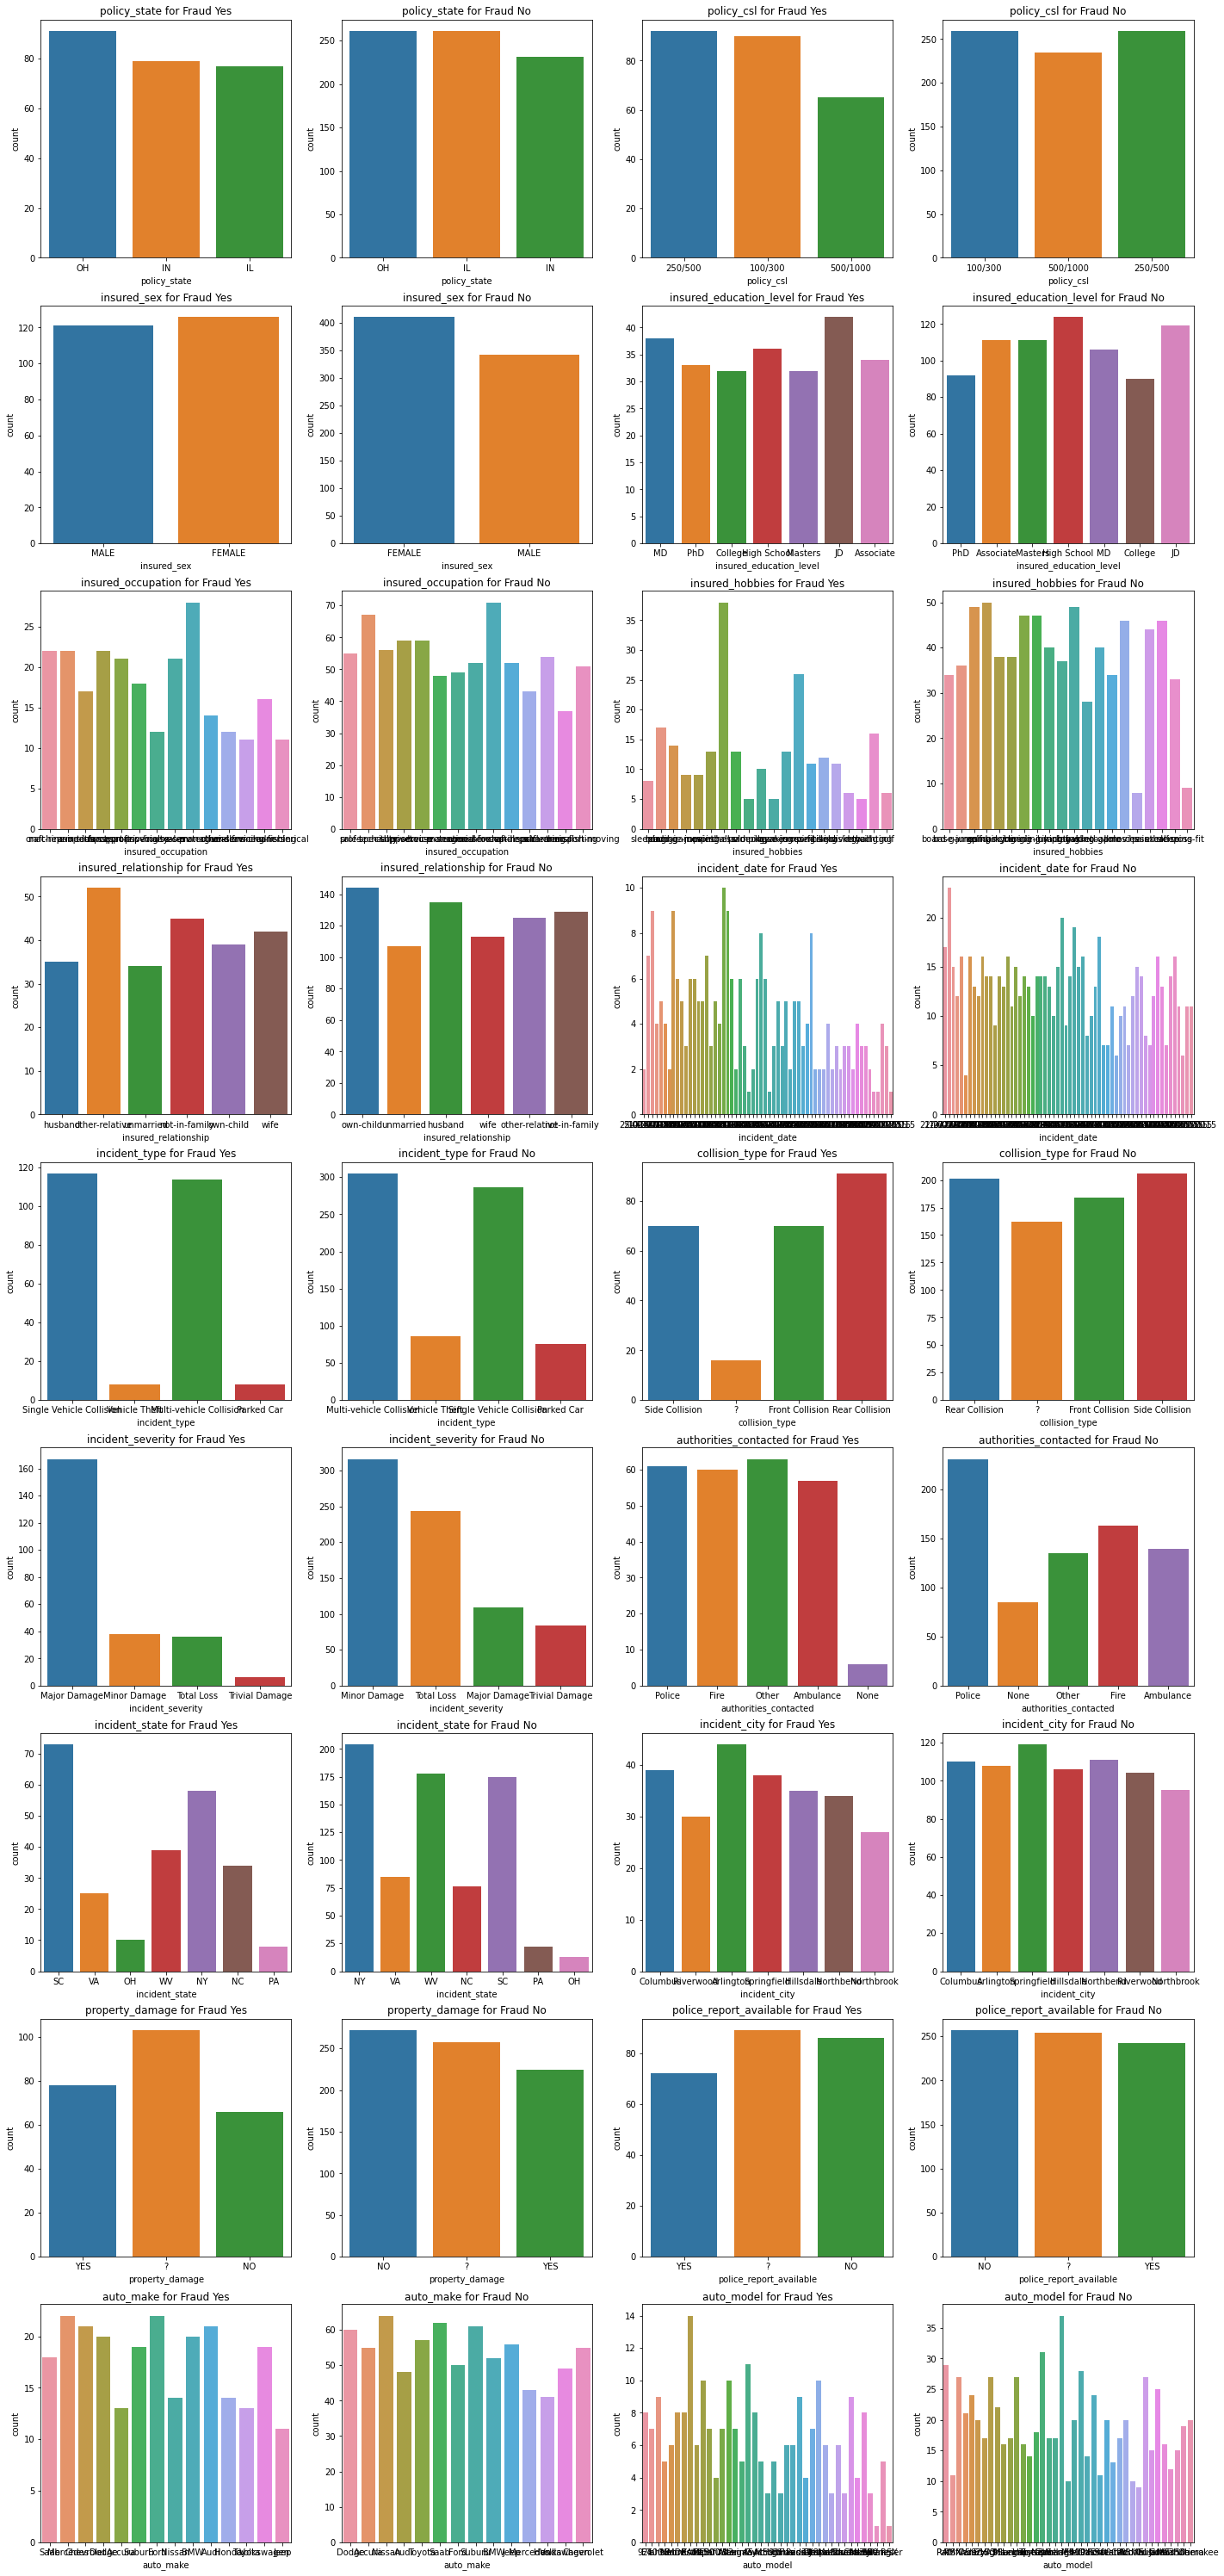

In [18]:
plt.figure(figsize=(24,60))
plotnumber=1
for col in cat_cols:
    if col!='fraud_reported':
        plt.subplot(10,4,plotnumber)
        sns.countplot(col, data=fraud_y)
        plotnumber+=1
        plt.title(f'{col} for Fraud Yes')
        plt.subplot(10,4,plotnumber)
        sns.countplot(col, data=fraud_n)
        plotnumber+=1
        plt.title(f'{col} for Fraud No')
        

<ul>
    <li>if the realationship is own child or husband, there is a high chance of not being are a fraud</li>
    <li>if relationship is other relative , there is a slight high chance of being a fraud</li>
    <li>If accident state is WV there is a high chance of not being a fraud</li>
    <li>If property damage is no, then there is a slight high chance of not being a fraud</li>
</ul>

<h4>Correlation Matrix</h4>

In [19]:
data.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.017895       0.006399      0.020209   
age                             0.025604      -0.007075      0.007368   
policy_deductable               0.004545       0.035212     -0.023544   
policy_annual_premium           0.032354      -0.013738      0.023547   
umbrella_limit                  0.019671      -0.047268     -0.024056   
insured_zip                     1.000000       0.006303      0.049372   
capital-gains                   0.006303       1.000000     -0.046904   
capital-loss                    0.049372      -0.046904      1.000000   
incident_hour_of_the_day        0.008274      -0.016406     -0.025054   
number_of_vehicles_involved     0.027448       0.061643     -0.014895   
bodily_injuries                 0.028695       0.055829     -0.024418   
witnesses                       0.019805      -0.017651     -0.041330   
total_claim_amount             -0.033873       0.015980     -0.036060   
injury_claim                   -0.017495       0.025934     -0.046060   
property_claim                 -0.006841      -0.000779     -0.022863   
vehicle_claim                  -0.041083       0.015836     -0.032665   
auto_year                      -0.032736       0.031398     -0.056615   

            

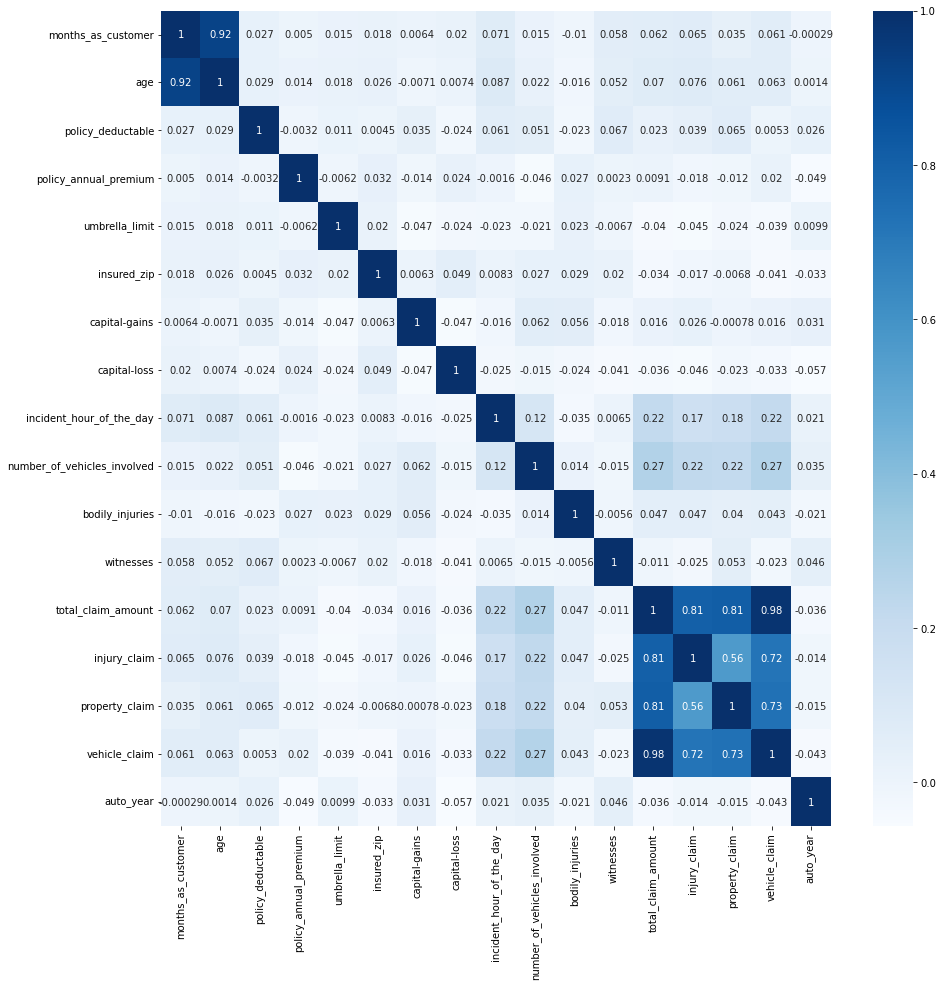

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>
    <ul>
        <li>92% correlation between age and months as customer</li>
        <li>81% correlation between injury_claim and total_claim_amount</li>
        <li>81% correlation between property_claim and total_claim_amoun</li>
        <li>98% correlation between vehicle_claim and total_claim_amount</li>
        <li>56% correaltion between property_claim and injury_claim</li>
        <li>72% correlation between vehicle_claim and injury_claim</li>
        <li>73% correlation between vehicle_claim and property_claim</li>
    </ul>
</strong>

<h4>Descriptive Statistics</h4>

In [21]:
data.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

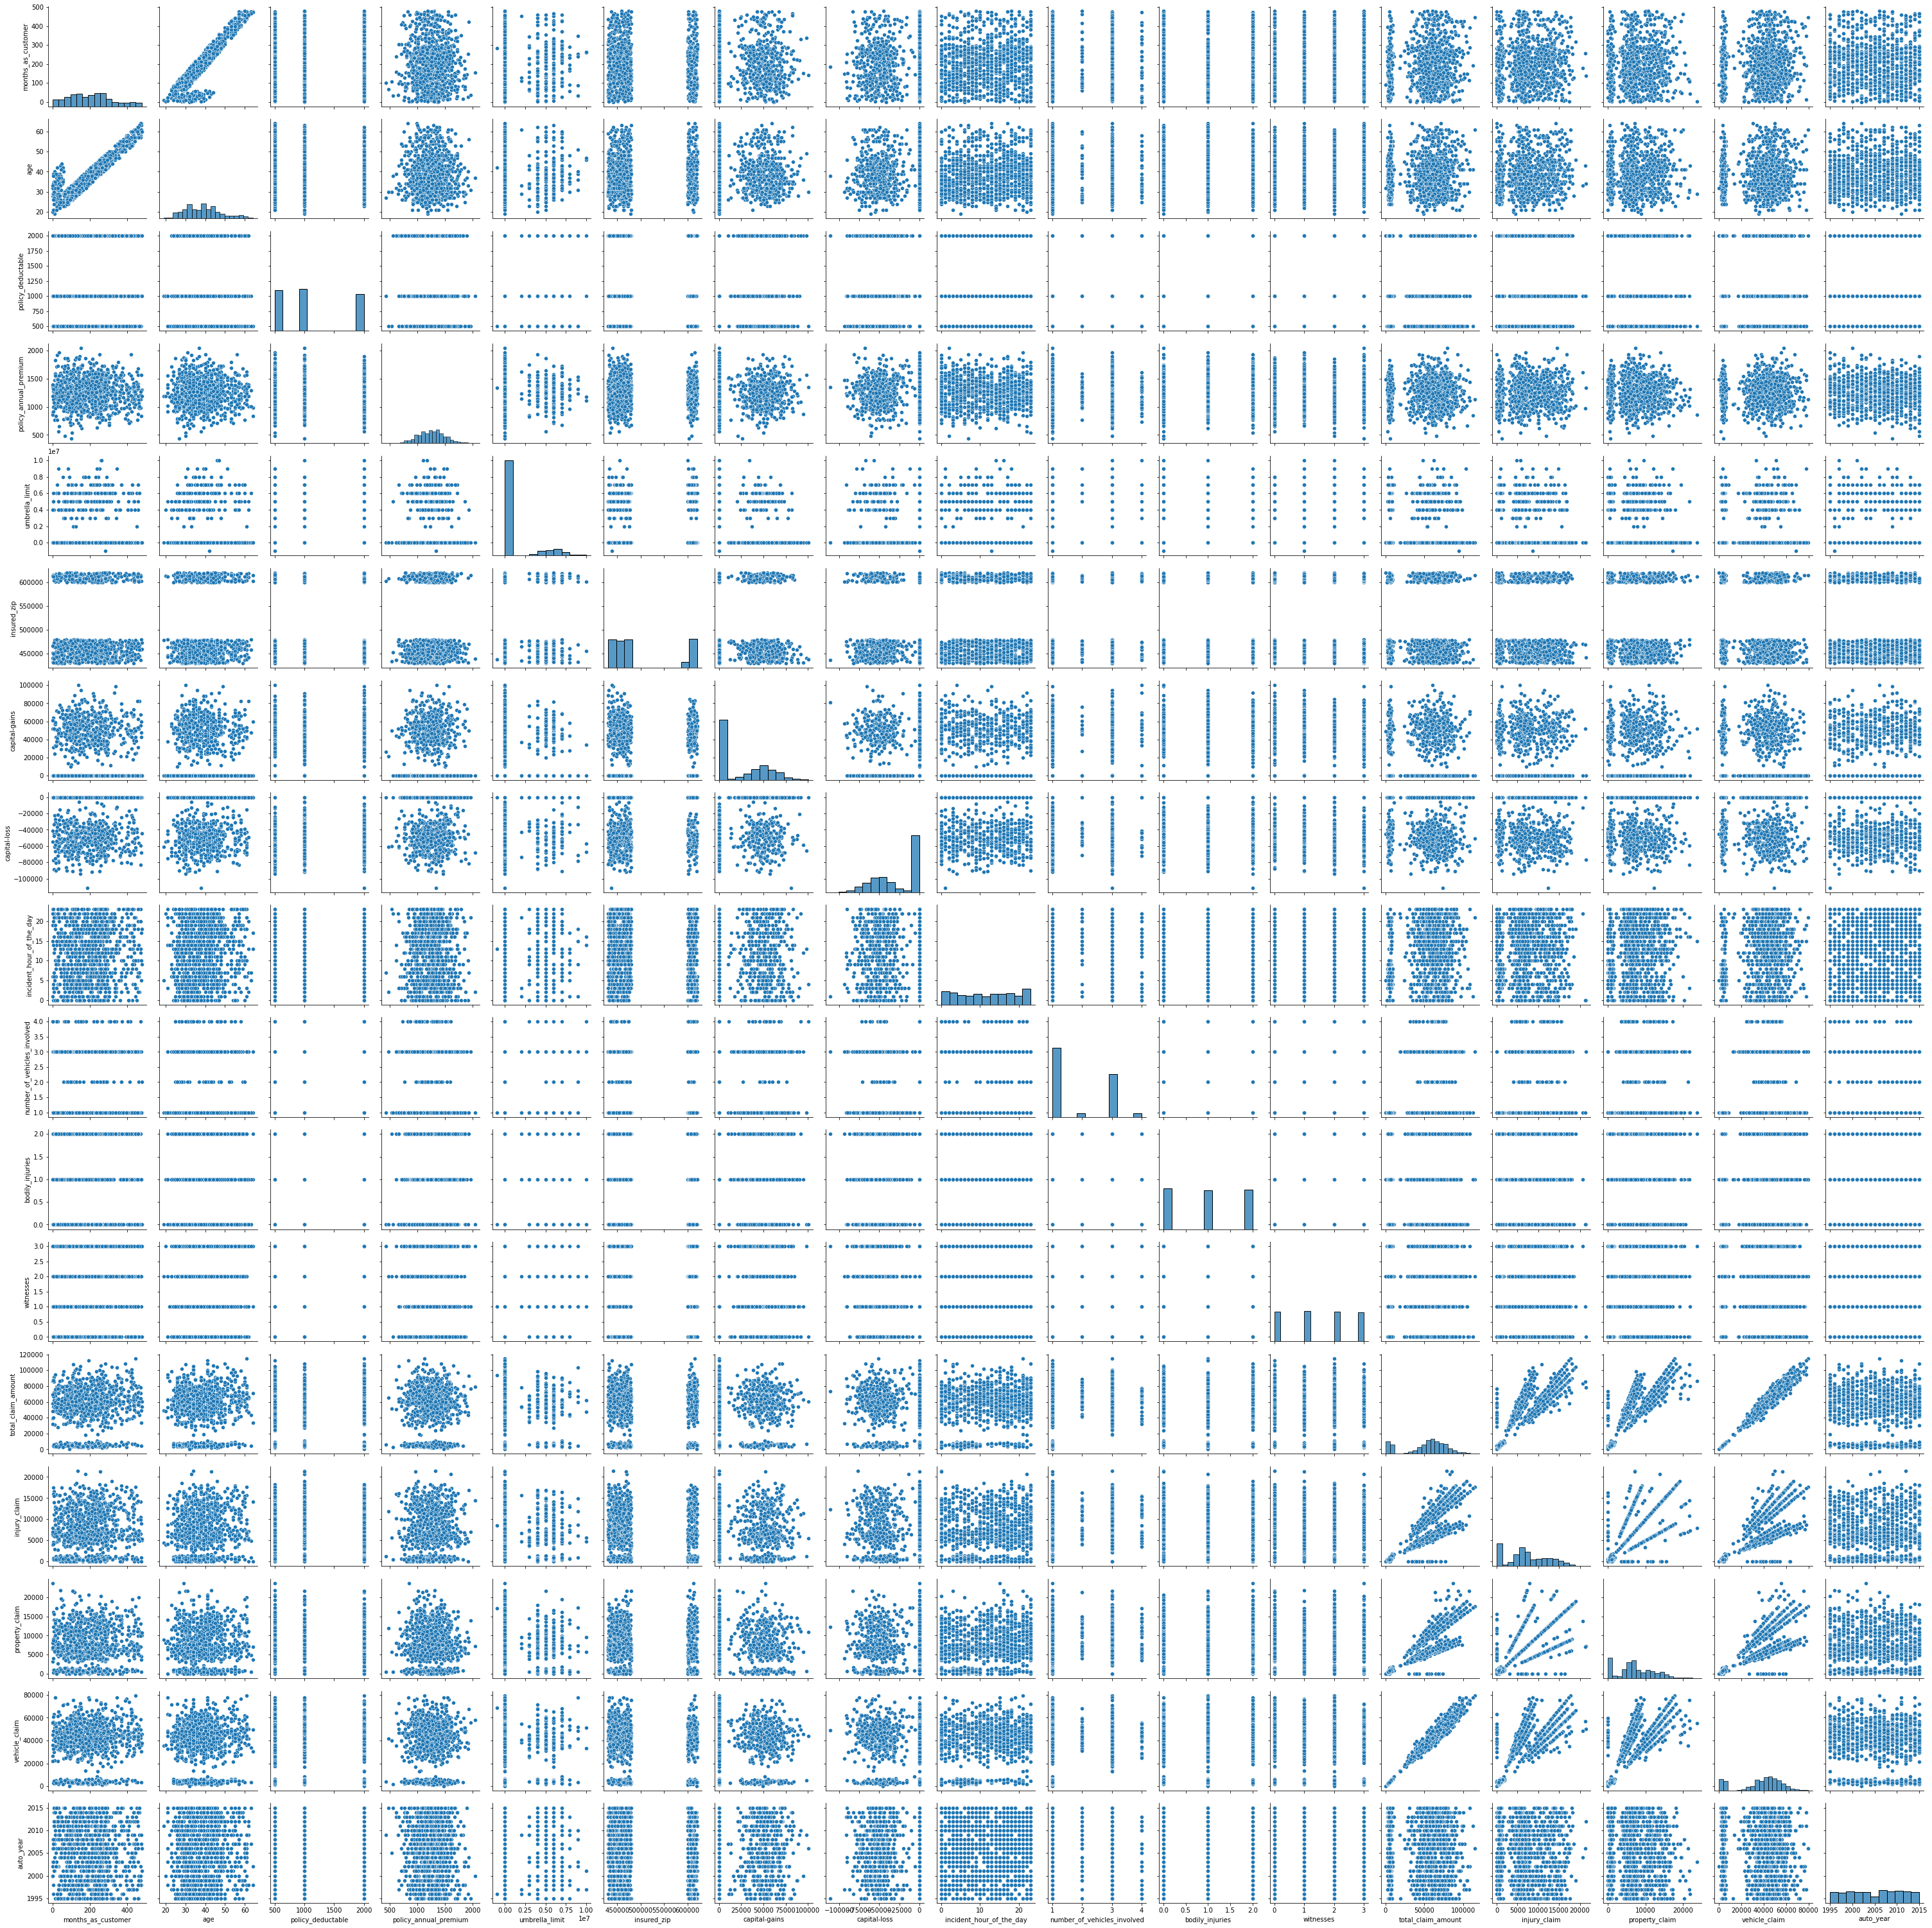

In [22]:
sns.pairplot(data)

<h3>Handling Outliers</h3>

<h4>Distplots</h4>

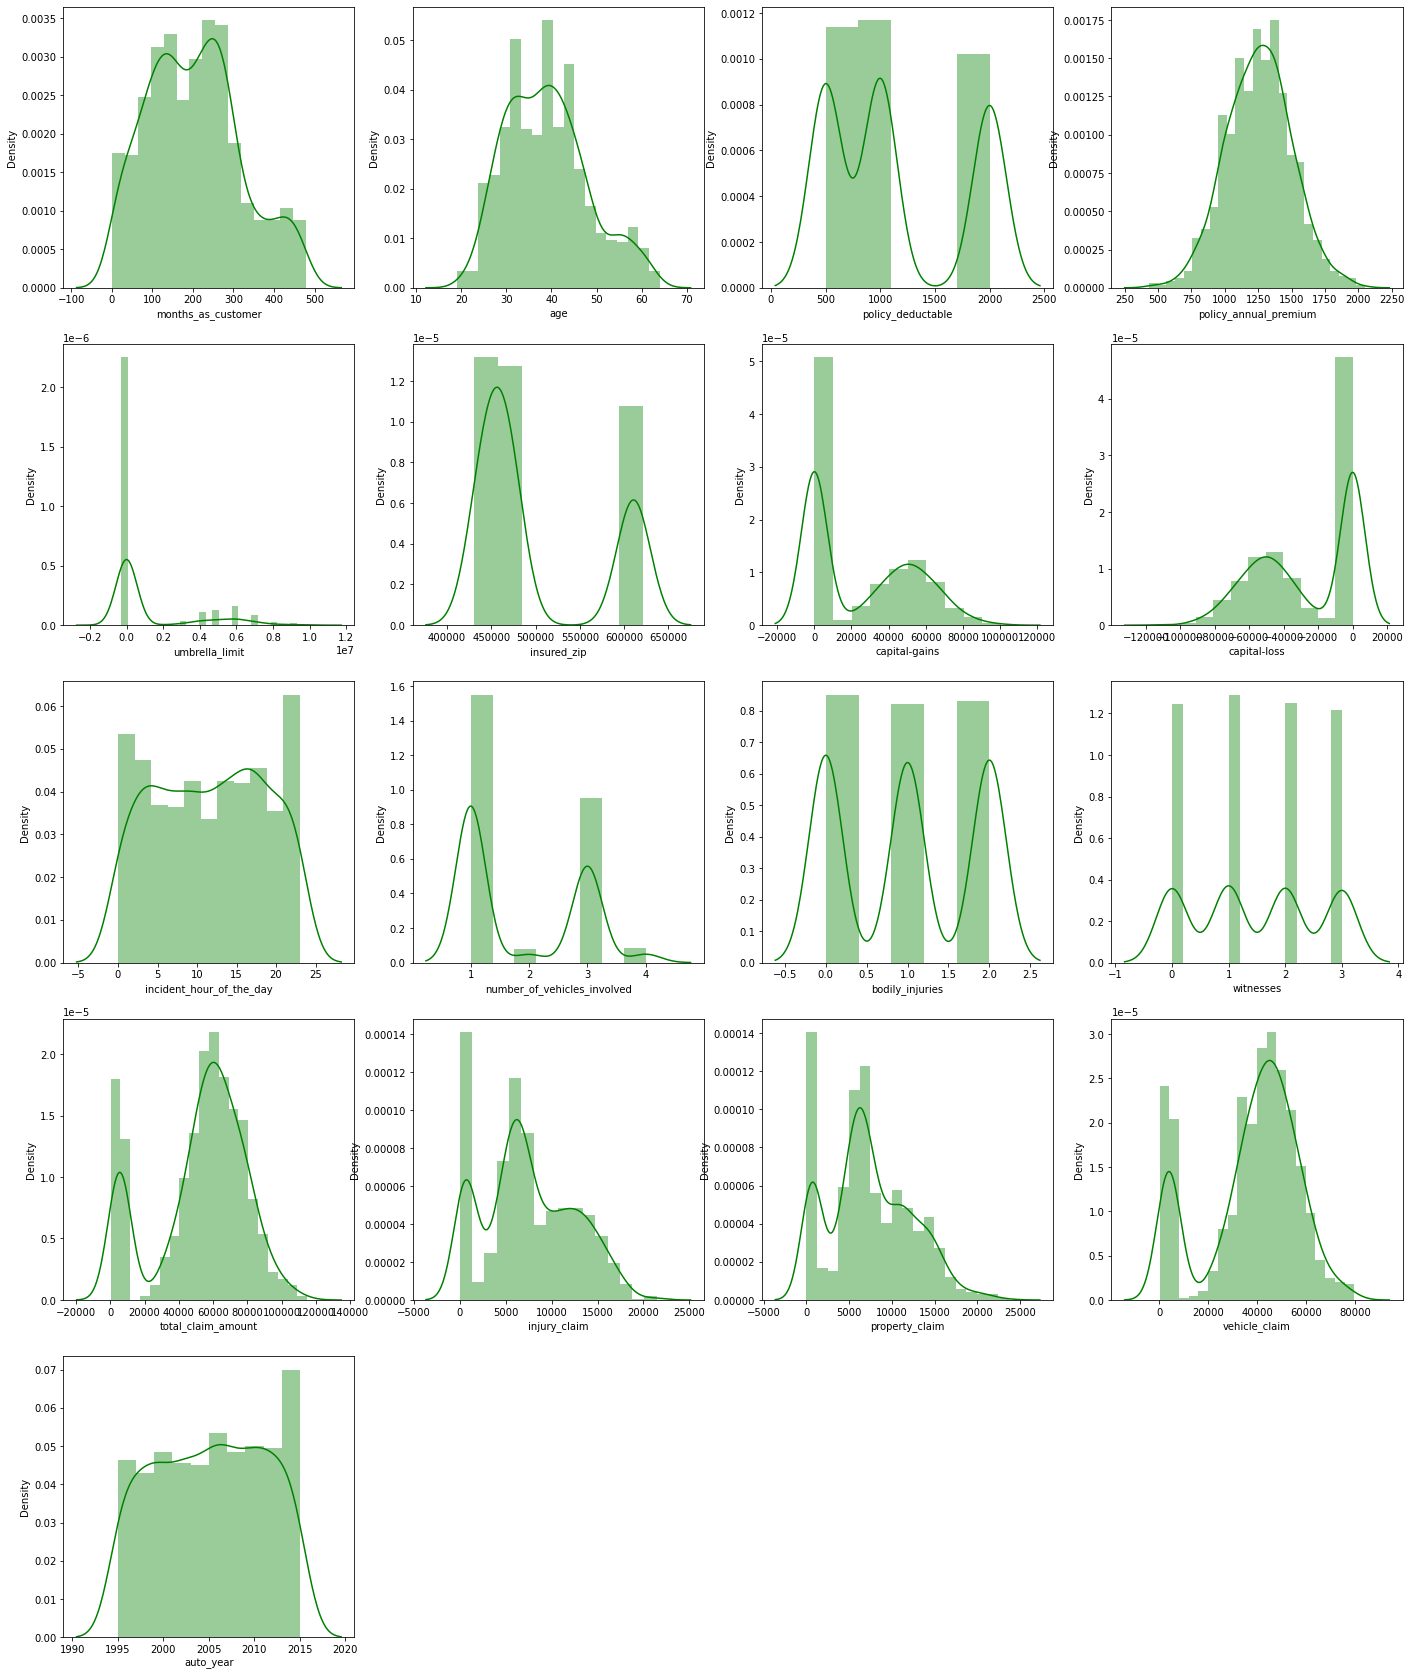

In [23]:
plt.figure(figsize=(24,30))
plotnumber  = 1
for col in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

In [24]:
data[num_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

<strong>Some columns have skew present in them</strong>

In [31]:
X = data[num_cols]

from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)
print(len(np.where(z>3)[0]))

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(1000, 17)
20
Old Shape (1000, 36)
New Shape (980, 36)
Total Dropped Rows 20


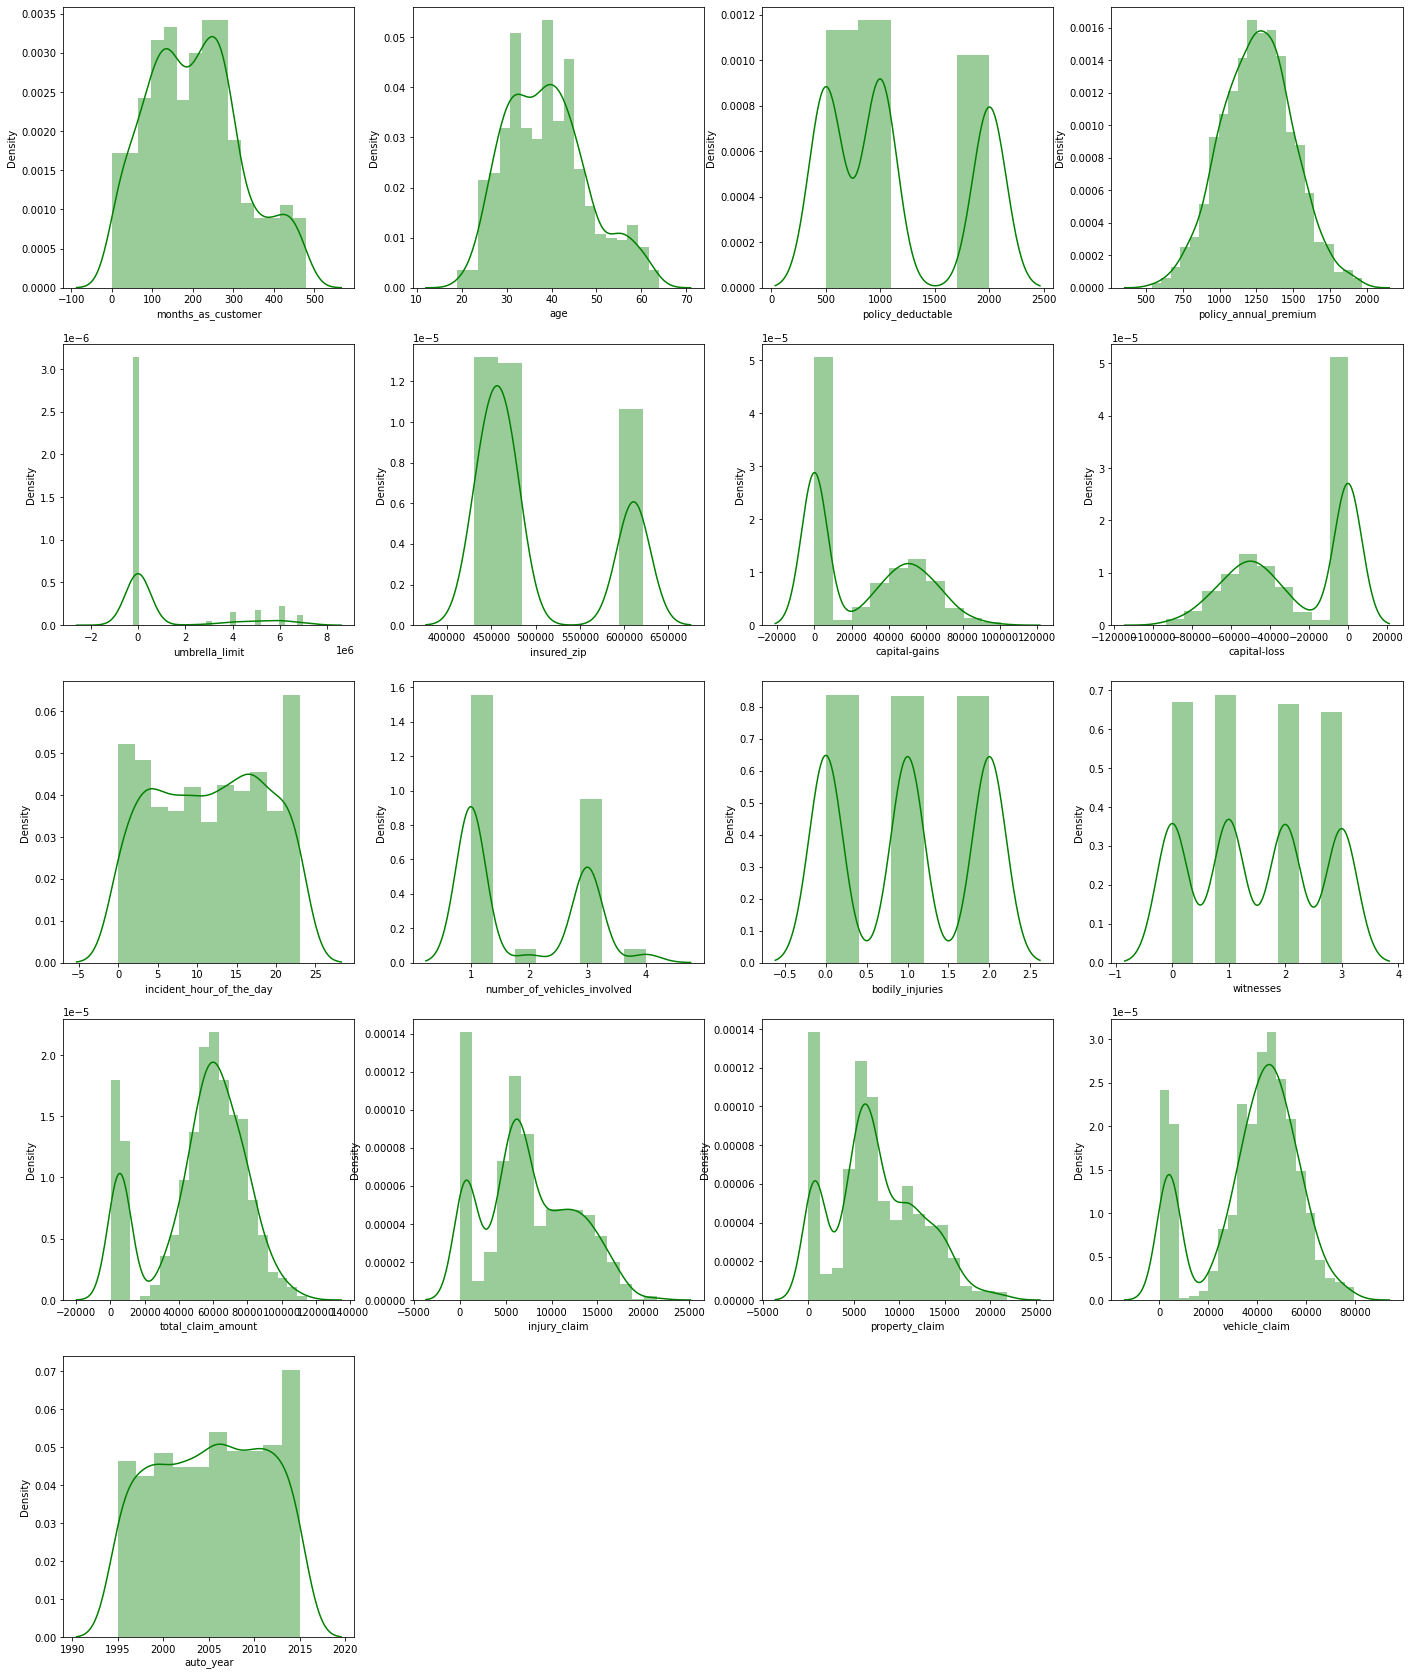

In [32]:
plt.figure(figsize=(24,30))
plotnumber  = 1
for col in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [33]:
data_new[num_cols].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
dtype: float64

<strong>Skew is removed slightly , but there is still skew present</strong>

In [34]:
data_new['fraud_reported'] = data_new['fraud_reported'].replace({'Y':0, 'N':1})

In [35]:
data_new['fraud_reported']

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 980, dtype: int64

In [37]:
X = data_new.drop(columns=['fraud_reported'])
y = data_new.fraud_reported

In [38]:
X = pd.get_dummies(X)
X.shape

(980, 222)

<h3>Preprocessing</h3>

In [39]:
from sklearn.preprocessing import power_transform
X_copy = power_transform(X, method='yeo-johnson')


In [40]:
X_copy = pd.DataFrame(X_copy, columns=X.columns)

In [41]:
X_copy

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              1.044541  1.002330           0.063154               0.623999   
1              0.299045  0.427171           1.271808              -0.241075   
2             -0.515819 -1.136013           1.271808               0.649541   
3              0.517526  0.324015           1.271808               0.660199   
4              0.299045  0.626869           0.063154               1.346451   
..                  ...       ...                ...                    ...   
975           -2.293459  0.000032           0.063154               0.228826   
976            0.735268  0.324015           0.063154               0.746426   
977           -0.554272 -0.470598          -1.215211               0.527900   
978            1.904088  2.121075           1.271808               0.418724   
979            1.891563  1.976564           0.063154              -2.059362   

     umbrella_limit  insured_zip  capital-gains  capital-loss  \
0         -0.337086          0.0       1.028989      1.048516   
1          1.482455          0.0      -0.986627      1.048516   
2          1.482455          0.0       0.955106      1.048516   
3          1.788485          0.0       1.013773     -1.006291   
4          1.788485          0.0       1.066686     -0.941672   
..              ...          ...            ...           ...   
975       -0.337086          0.0      -0.986627      1.048516   
976       -0.337086          0.0       1.079302      1.048516   
977        0.839984          0.0       0.955106      1.048516   
978        1.482455          0.0      -0.986627      1.048516   
979       -0.337086          0.0      -0.986627      1.048516   

     incident_hour_of_the_day  number_of_vehicles_involved  ...  \
0                   -0.916935                    -0.839387  ...   
1                   -0.447636                    -0.839387  ...   
2                   -0.599018                     1.194880  ...   
3                   -0.916935                    -0.839387  ...   
4                    1.144669                    -0.839387  ...   
..                        ...                          ...  ...   
975                  1.144669                    -0.839387  ...   
976                  1.501769                    -0.839387  ...   
977                 -1.085544                     1.194880  ...   
978                 -1.451402                    -0.839387  ...   
979                 -0.755162                    -0.839387  ...   

     auto_model_Pathfinder  auto_model_RAM  auto_model_RSX  \
0                -0.180737       -0.214222       -0.111340   
1                -0.180737       -0.214222       -0.111340   
2                -0.180737        4.668051       -0.111340   
3                -0.180737       -0.214222       -0.111340   
4                -0.180737       -0.214222        8.981462   
..                     ...             ...             ...   
975              -0.180737       -0.214222       -0.111340   
976              -0.180737       -0.214222       -0.111340   
977              -0.180737       -0.214222       -0.111340   
978              -0.180737       -0.214222       -0.111340   
979              -0.180737       -0.214222       -0.111340   

     auto_model_Silverado  auto_model_TL  auto_model_Tahoe  auto_model_Ultima  \
0                -0.15154       -0.14061         -0.158444           -0.15154   
1                -0.15154       -0.14061         -0.158444           -0.15154   
2                -0.15154       -0.14061         -0.158444           -0.15154   
3                -0.15154       -0.14061          6.311365           -0.15154   
4                -0.15154       -0.14061         -0.158444           -0.15154   
..                    ...            ...               ...                ...   
975              -0.15154       -0.14061         -0.158444           -0.15154   
976              -0.15154       -0.14061         -0.158444           -0.15154

<h3>Scaling</h3>

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X_copy)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [43]:
X_scaled

months_as_customer       age  policy_deductable  policy_annual_premium  \
0              1.044541  1.002330           0.063154               0.623999   
1              0.299045  0.427171           1.271808              -0.241075   
2             -0.515819 -1.136013           1.271808               0.649541   
3              0.517526  0.324015           1.271808               0.660199   
4              0.299045  0.626869           0.063154               1.346451   
..                  ...       ...                ...                    ...   
975           -2.293459  0.000032           0.063154               0.228826   
976            0.735268  0.324015           0.063154               0.746426   
977           -0.554272 -0.470598          -1.215211               0.527900   
978            1.904088  2.121075           1.271808               0.418724   
979            1.891563  1.976564           0.063154              -2.059362   

     umbrella_limit  insured_zip  capital-gains  capital-loss  \
0         -0.337086          0.0       1.028989      1.048516   
1          1.482455          0.0      -0.986627      1.048516   
2          1.482455          0.0       0.955106      1.048516   
3          1.788485          0.0       1.013773     -1.006291   
4          1.788485          0.0       1.066686     -0.941672   
..              ...          ...            ...           ...   
975       -0.337086          0.0      -0.986627      1.048516   
976       -0.337086          0.0       1.079302      1.048516   
977        0.839984          0.0       0.955106      1.048516   
978        1.482455          0.0      -0.986627      1.048516   
979       -0.337086          0.0      -0.986627      1.048516   

     incident_hour_of_the_day  number_of_vehicles_involved  ...  \
0                   -0.916935                    -0.839387  ...   
1                   -0.447636                    -0.839387  ...   
2                   -0.599018                     1.194880  ...   
3                   -0.916935                    -0.839387  ...   
4                    1.144669                    -0.839387  ...   
..                        ...                          ...  ...   
975                  1.144669                    -0.839387  ...   
976                  1.501769                    -0.839387  ...   
977                 -1.085544                     1.194880  ...   
978                 -1.451402                    -0.839387  ...   
979                 -0.755162                    -0.839387  ...   

     auto_model_Pathfinder  auto_model_RAM  auto_model_RSX  \
0                -0.180737       -0.214222       -0.111340   
1                -0.180737       -0.214222       -0.111340   
2                -0.180737        4.668051       -0.111340   
3                -0.180737       -0.214222       -0.111340   
4                -0.180737       -0.214222        8.981462   
..                     ...             ...             ...   
975              -0.180737       -0.214222       -0.111340   
976              -0.180737       -0.214222       -0.111340   
977              -0.180737       -0.214222       -0.111340   
978              -0.180737       -0.214222       -0.111340   
979              -0.180737       -0.214222       -0.111340   

     auto_model_Silverado  auto_model_TL  auto_model_Tahoe  auto_model_Ultima  \
0                -0.15154       -0.14061         -0.158444           -0.15154   
1                -0.15154       -0.14061         -0.158444           -0.15154   
2                -0.15154       -0.14061         -0.158444           -0.15154   
3                -0.15154       -0.14061          6.311365           -0.15154   
4                -0.15154       -0.14061         -0.158444           -0.15154   
..                    ...            ...               ...                ...   
975              -0.15154       -0.14061         -0.158444           -0.15154   
976              -0.15154       -0.14061         -0.158444           -0.15154

In [47]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Columns: 222 entries, months_as_customer to auto_model_X6
dtypes: float64(222)
memory usage: 1.7 MB


In [48]:
X = X_scaled

<h3>MultiCollinearity Using VIF</h3>

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

vif            Features
12  223.342643  total_claim_amount
15  112.912780       vehicle_claim
14   10.335066      property_claim
13   10.175721        injury_claim
1     4.693013                 age

In [50]:
num_cols.remove('total_claim_amount')

X = X.drop(columns=['total_claim_amount'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

vif            Features
1   4.685124                 age
0   4.676620  months_as_customer
14  3.544983       vehicle_claim
13  2.651369      property_claim
12  2.443729        injury_claim

<strong>VIF is now less than 5 for all columns</strong>

<h3>OverSampling</h3>

In [51]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<h2>Building and Training Models</h2>

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1036, 221)
(444, 221)


<h3>Logistic Regression</h3>

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9488416988416989
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       514
           1       0.94      0.95      0.95       522

    accuracy                           0.95      1036
   macro avg       0.95      0.95      0.95      1036
weighted avg       0.95      0.95      0.95      1036


Testing Accuracy : 0.8468468468468469
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       247
           1       0.80      0.87      0.83       197

    accuracy                           0.85       444
   macro avg       0.85      0.85      0.85       444
weighted avg       0.85      0.85      0.85       444



Text(33.0, 0.5, 'Predicted')

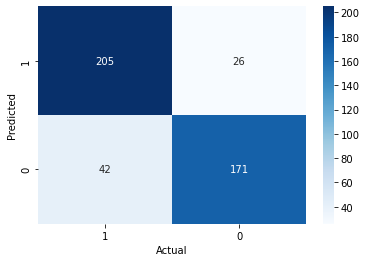

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

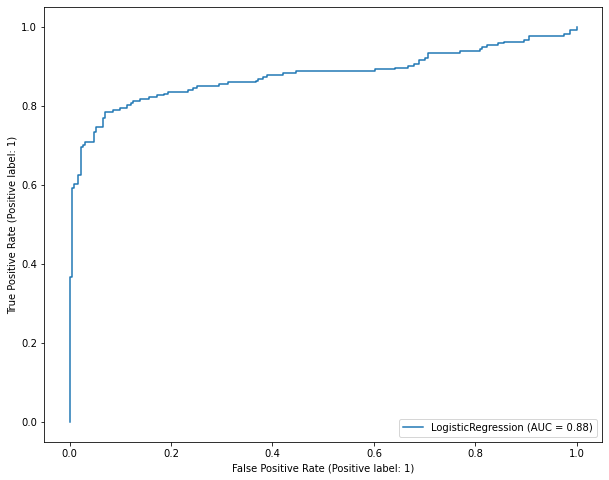

In [55]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

HyperParameter Tuning

In [57]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(2,20,4),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.8561615146184133
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 2, 'penalty': 'l2', 'solver': 'liblinear'}


In [58]:
lrcv = LogisticRegression(solver='liblinear', max_iter=2)
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9285714285714286
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       521
           1       0.92      0.94      0.93       515

    accuracy                           0.93      1036
   macro avg       0.93      0.93      0.93      1036
weighted avg       0.93      0.93      0.93      1036


Testing Accuracy : 0.8828828828828829
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       255
           1       0.82      0.93      0.87       189

    accuracy                           0.88       444
   macro avg       0.88      0.89      0.88       444
weighted avg       0.89      0.88      0.88       444



Text(33.0, 0.5, 'Predicted')

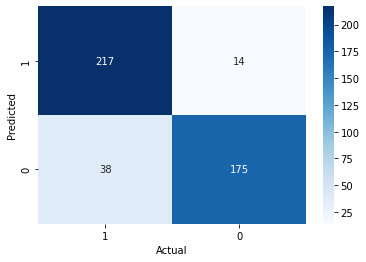

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

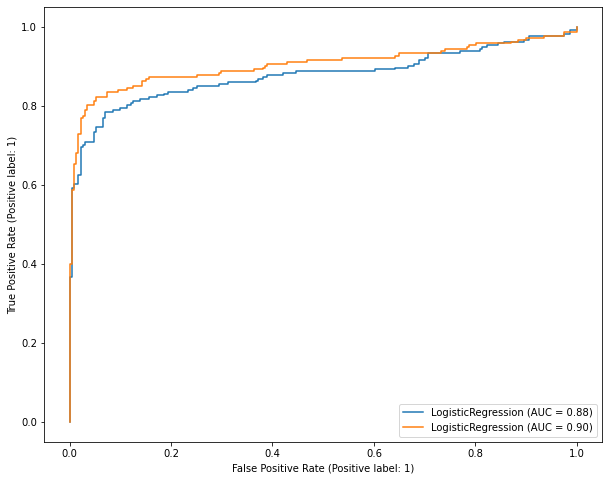

In [60]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighbors Classifier</h3>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.6341698841698842
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.57      0.73       878
           1       0.29      0.97      0.45       158

    accuracy                           0.63      1036
   macro avg       0.64      0.77      0.59      1036
weighted avg       0.88      0.63      0.68      1036


Testing Accuracy : 0.5923423423423423
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.56      0.72       408
           1       0.16      0.94      0.27        36

    accuracy                           0.59       444
   macro avg       0.58      0.75      0.49       444
weighted avg       0.92      0.59      0.68       444



Text(33.0, 0.5, 'Predicted')

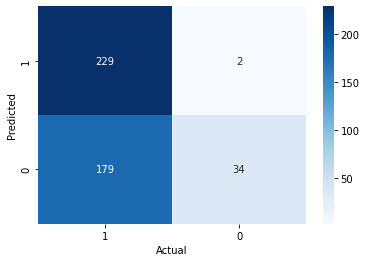

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

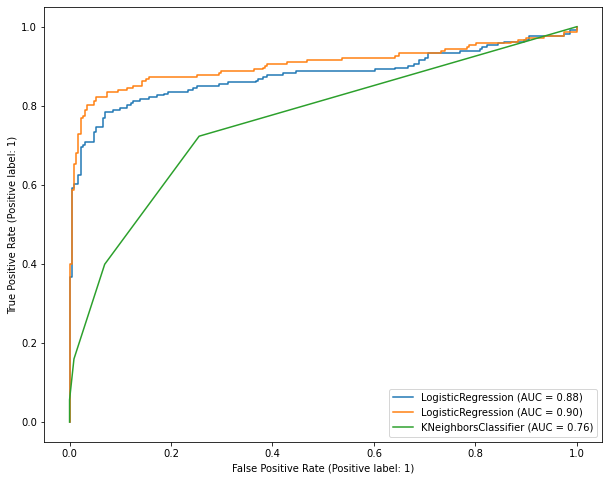

In [63]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

HyperParameter Tuning

In [64]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13],
    'leaf_size':[5,10,15,25,30,35,40,50]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Score: 0.574320739437603
Best Params: {'leaf_size': 5, 'n_neighbors': 3}


In [65]:
knncv = KNeighborsClassifier(n_neighbors=3, leaf_size=5)
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.722007722007722
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.64      0.78       791
           1       0.46      0.99      0.63       245

    accuracy                           0.72      1036
   macro avg       0.73      0.81      0.70      1036
weighted avg       0.87      0.72      0.74      1036


Testing Accuracy : 0.6283783783783784
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.99      0.58      0.73       390
           1       0.24      0.94      0.38        54

    accuracy                           0.63       444
   macro avg       0.61      0.76      0.56       444
weighted avg       0.90      0.63      0.69       444



Text(33.0, 0.5, 'Predicted')

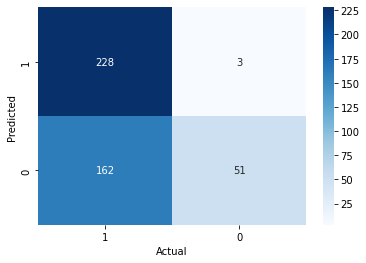

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


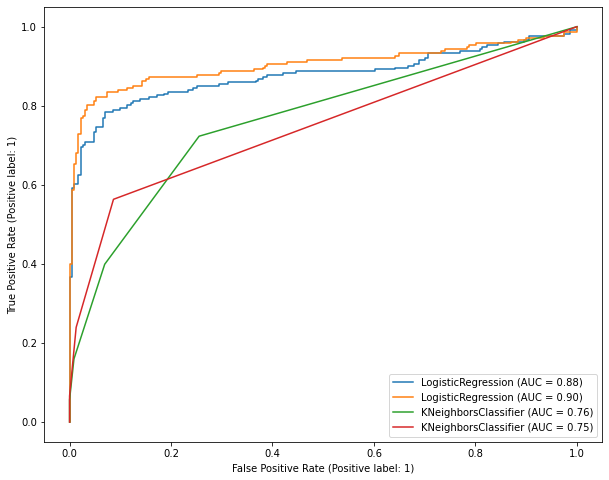

In [67]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<strong>Logistic Regression was performing better than KNN</strong>

<h3>DecisionTree Classifier</h3>

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       527

    accuracy                           1.00      1036
   macro avg       1.00      1.00      1.00      1036
weighted avg       1.00      1.00      1.00      1036


Testing Accuracy : 0.8558558558558559
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       229
           1       0.85      0.85      0.85       215

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



Text(33.0, 0.5, 'Predicted')

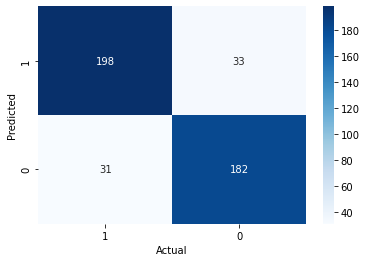

In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

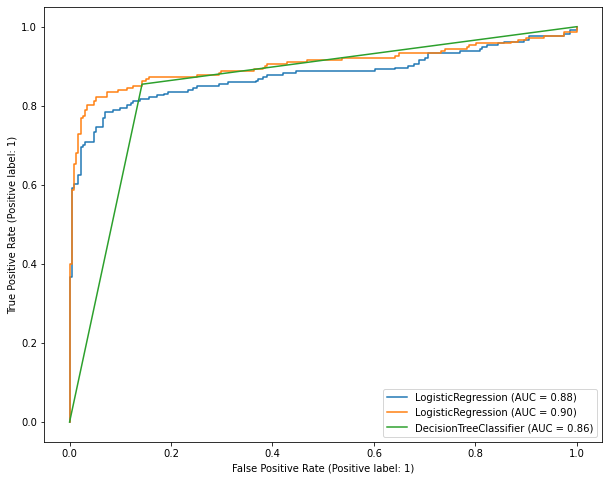

In [70]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

HyperParameter Tunning

In [74]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,17,18,19,20,21,22],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5,6,7],
    'max_leaf_nodes':[16,17,18,19,20,25,30,35,40,50,None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Best Score: 0.8976794839574431
Best Params: {'criterion': 'gini', 'max_depth': 18, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [78]:
dtcv = DecisionTreeClassifier(criterion='gini', max_depth=20, max_leaf_nodes=16, min_samples_leaf=3, min_samples_split=3, splitter='random')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9073359073359073
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       539
           1       0.88      0.93      0.91       497

    accuracy                           0.91      1036
   macro avg       0.91      0.91      0.91      1036
weighted avg       0.91      0.91      0.91      1036


Testing Accuracy : 0.8851351351351351
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.94      0.85      0.90       256
           1       0.82      0.93      0.87       188

    accuracy                           0.89       444
   macro avg       0.88      0.89      0.88       444
weighted avg       0.89      0.89      0.89       444



Text(33.0, 0.5, 'Predicted')

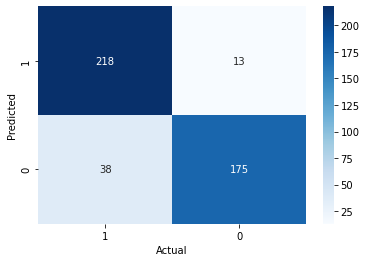

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

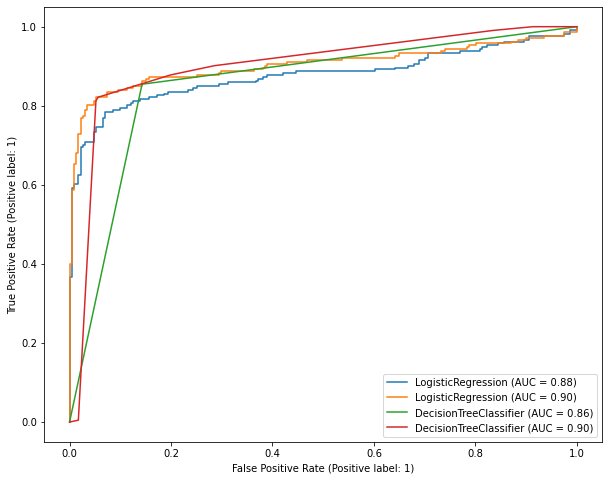

In [80]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<strong>Decsion Tree and Logistic Regreesion are fairly close to each other</strong>

<h3>RandomForest Classifier</h3>

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       527

    accuracy                           1.00      1036
   macro avg       1.00      1.00      1.00      1036
weighted avg       1.00      1.00      1.00      1036


Testing Accuracy : 0.8873873873873874
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       229
           1       0.89      0.88      0.88       215

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



Text(33.0, 0.5, 'Predicted')

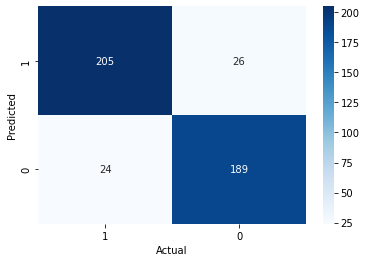

In [82]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

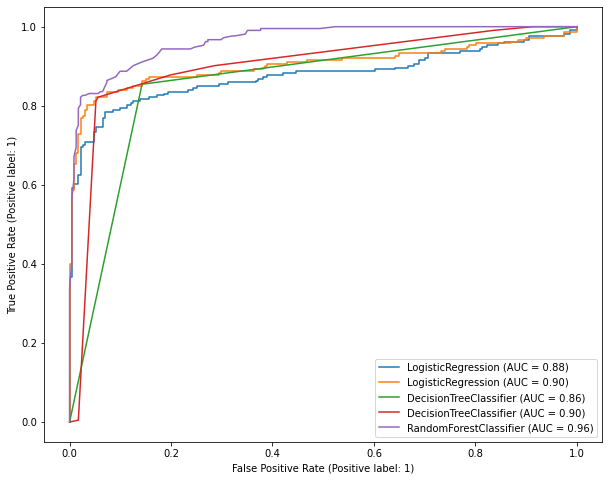

In [83]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)


HyperParameter Tuning

In [84]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[180,200,250,300,350],
    'max_depth':[None,16,17,18],
    'min_samples_split':[2,3,4,],
    'min_samples_leaf':[2,3,4,],
    'max_leaf_nodes':[None,35,40,45,50,55],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Score: 0.8967216776967971
Best Params: {'max_depth': 18, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200, 'n_jobs': -1}


In [88]:
rfcv = RandomForestClassifier( max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=200, max_leaf_nodes=None)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9884169884169884
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       499
           1       1.00      0.98      0.99       537

    accuracy                           0.99      1036
   macro avg       0.99      0.99      0.99      1036
weighted avg       0.99      0.99      0.99      1036


Testing Accuracy : 0.8761261261261262
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       228
           1       0.88      0.87      0.87       216

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444



Text(33.0, 0.5, 'Predicted')

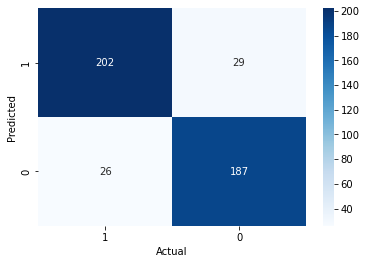

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

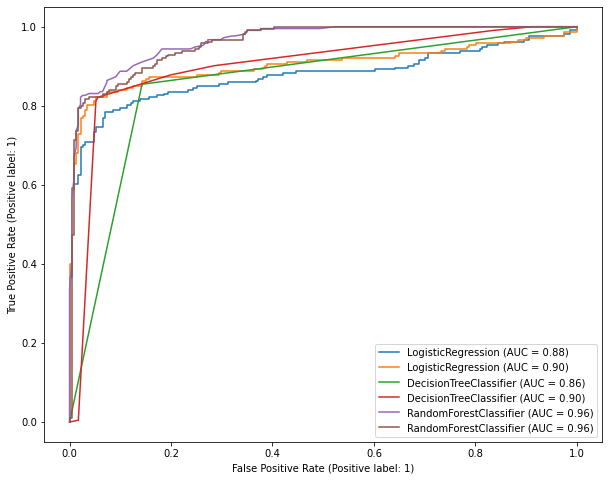

In [90]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>This model is best performing as it has the highest AUC</strong>

<h3>AdaBoost Classifier</h3>

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9285714285714286
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       497
           1       0.94      0.92      0.93       539

    accuracy                           0.93      1036
   macro avg       0.93      0.93      0.93      1036
weighted avg       0.93      0.93      0.93      1036


Testing Accuracy : 0.8671171171171171
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       230
           1       0.86      0.86      0.86       214

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444



Text(33.0, 0.5, 'Predicted')

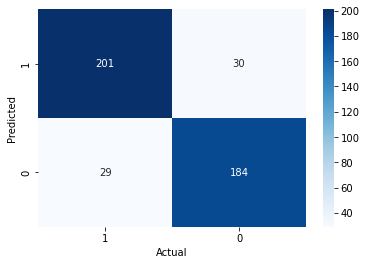

In [93]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

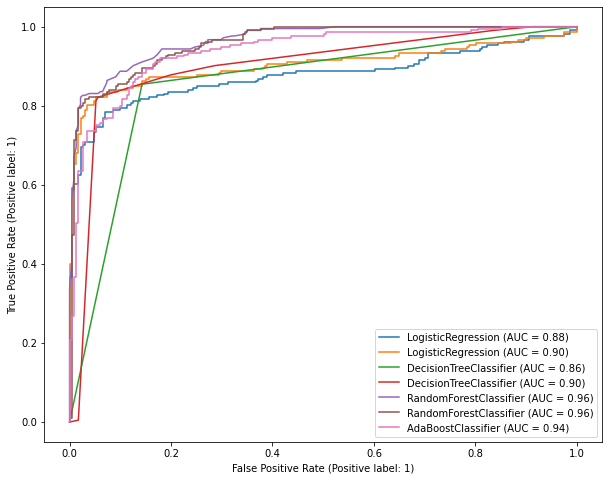

In [94]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)

In [95]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Score: 0.8947893105470387
Best Params: {'learning_rate': 0.1, 'n_estimators': 110}


In [96]:
adcv = AdaBoostClassifier(n_estimators=110, learning_rate=0.1)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9015444015444015
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       529
           1       0.88      0.92      0.90       507

    accuracy                           0.90      1036
   macro avg       0.90      0.90      0.90      1036
weighted avg       0.90      0.90      0.90      1036


Testing Accuracy : 0.8806306306306306
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       250
           1       0.83      0.91      0.87       194

    accuracy                           0.88       444
   macro avg       0.88      0.88      0.88       444
weighted avg       0.88      0.88      0.88       444



Text(33.0, 0.5, 'Predicted')

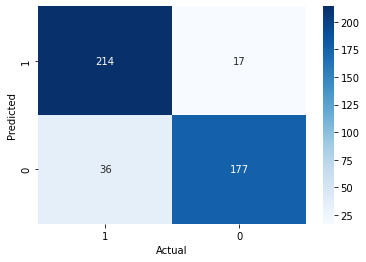

In [97]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

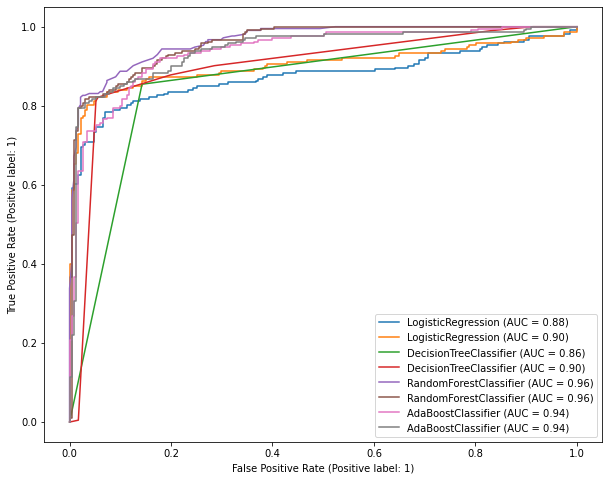

In [98]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>RandomForest is the best performing model as it has highest AUC</strong>

<h3>Model Saving</h3>

In [99]:
import pickle
pickle.dump(rf, open('final.pickle', 'wb'))